# Natural Language Processing

We have previously seen a number of examples where we are *supposed* to use preprocessing, but in all these cases you will still get somewhat usable results even if you don't do any processing at all. In the real world, it is very common to have cases where this isn't possible for a number of reasons; perhaps the data is too "large" to simply plug it into a model (for example - a music analysis model for a 3min song has about 8 million datapoints per song!); or the data is in a non-numeric form like text. In both of these cases we have to employ some "old school" computer science (i.e. mathematics!) to get around these problems.

In this session, we'll look at the world of Natural Language Processing (NLP) using a few libraries to make our lives easier. We'll see some common types of problem you'll see when preprocessing data, and how to solve them. We will be applying the tools to build models for "sentiment analysis", or automatically detecting the positive/negative nature of a bit of text.

# Getting Started

The first step for any machine learning project is to explore our data. For everything we'll be doing, we'll be using the UMICH SI650 - Sentiment Classification dataset. Let's take a look:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# I'm being nasty now - this is the raw data from the authors of the paper.
# So it's *tab* seperated! Not commas! A problem only solvable by getting an
# error.
umich = pd.read_csv("./umich.txt", sep="\t", names=['Label', 'Text'])

umich.head()

,Label,Text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [ ]:
# I am only calling this to get the % of positive to negative reviews
umich.describe()

,Label
count,6918.000000
mean,0.569962
std,0.495117
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


So it looks like we have an about even number of positive to negative reviews. Let's try getting the most common words in each class:

In [ ]:
# Multiple options here again - I like converting to a list here.
positives = umich[umich['Label'] == 1]['Text'].to_list()
negatives = umich[umich['Label'] == 0]['Text'].to_list()

print(positives[:5])

['The Da Vinci Code book is just awesome.', "this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this.", 'i liked the Da Vinci Code a lot.', 'i liked the Da Vinci Code a lot.', "I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own."]


In [ ]:
# Ok - so our text is seperated by spaces. Let's split them up and just get a
# list of all the words.

def split_and_flatten(listy):

    output = []

    for line in listy:
        line = line.split(" ")
        output += line

    return output

pos_split = split_and_flatten(positives)

# Great!!!
print(pos_split[:5])

['The', 'Da', 'Vinci', 'Code', 'book']


In [ ]:
from collections import Counter

# Now we use the Counter to look at the most common elements.
print(Counter(pos_split).most_common(5))

print(Counter(pos_split))

[('I', 2450), ('the', 1263), ('love', 1246), ('Harry', 1085), ('is', 906)]
Counter({'I': 2450, 'the': 1263, 'love': 1246, 'Harry': 1085, 'is': 906, 'and': 857, 'was': 831, 'like': 789, 'a': 766, 'Da': 702, 'Vinci': 701, 'Brokeback': 675, 'i': 672, 'The': 561, 'Mission': 529, 'to': 528, 'Code': 482, 'that': 461, 'mission': 456, 'Potter': 444, 'Impossible': 432, 'impossible': 373, 'as': 360, '"': 350, 'awesome': 324, 'it': 302, 'Mountain': 301, 'so': 291, 'Potter.': 271, 'because': 259, '3': 227, 'brokeback': 218, 'an': 214, 'vinci': 211, 'da': 210, 'you': 199, 'LOVE': 198, 'for': 191, 'Potter,': 190, 'be': 186, 'really': 185, 'much': 177, 'Mountain.': 176, 'if': 175, 'know': 173, 'want': 172, 'would': 172, 'or': 172, 'series': 171, '/': 170, 'people': 167, 'who': 167, 'AWESOME': 166, 'loved': 165, 'why': 165, 'Potter..': 163, 'of': 156, 'but': 141, 'awesome.': 119, 'code': 117, 'my': 111, 'mountain': 108, 'movie.': 102, 'are': 102, 'we': 101, 'good': 100, 'liked': 99, 'read': 99, 'one':

Oh. We have a number of problems here we need to deal with:

* We have a number of "filler" words ("I", "the", "is"...) that aren't really relevant to the sentiment of the text.
* Different capitalisations of words are treated as different entries ("MOUNTAIN", "Mountain", "mountain"...)
* Punctuation is still included and is causing chaos ("awesome...", "awesome", "awesome!"... are treated as different entries).

There are a number of different ways of doing this - and all of them seem to combine both manual Python and library usage. We're solidly in the realm of graduate stuff here so we have to rely on ourselves a bit more!

We'll be using the Natural Language Toolkit package (NLTK) for some helpful functions. NLTK offers a lot of ways to implement classification/clustering models from their API, however it seems to be a bit limited at the moment.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# NLTK is one of those packages that needs some funky setup to work.
# You get an error telling you to put this line in if you miss it out!
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stopwords = stopwords.words('english')

def stopword_and_punct_filter(word):
    return word.isalpha() and word not in stopwords

def split_and_flatten_v2(listy):

    output = []

    for line in listy:
        line = map(lambda x: x.lower(), word_tokenize(line))
        output += line

    return list(filter(stopword_and_punct_filter, output))

pos_split = split_and_flatten_v2(positives)

print(Counter(pos_split).most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[('love', 1534), ('harry', 1085), ('awesome', 1027), ('vinci', 1000), ('da', 999), ('brokeback', 999), ('mission', 997), ('impossible', 997), ('code', 993), ('mountain', 984)]


That looks a lot better! Now let's look at the negatives:

In [ ]:
neg_split = split_and_flatten_v2(negatives)

print(Counter(neg_split).most_common(10))

[('harry', 1003), ('vinci', 1001), ('da', 999), ('mountain', 998), ('brokeback', 997), ('code', 993), ('potter', 894), ('sucks', 592), ('hate', 571), ('movie', 553)]


Now just for fun, let's take the top 20 most common words of each group and print out the words not in the other one:

In [ ]:
pos_counter = Counter(pos_split).most_common(20)
neg_counter = Counter(neg_split).most_common(20)

print("Positive uniques:")
for word in pos_counter:
    if word[0] not in [a[0] for a in neg_counter]:
        print(word)

print("Negative uniques:")
for word in neg_counter:
    if word[0] not in [a[0] for a in pos_counter]:
            print(word)

Positive uniques:
('love', 1534)
('awesome', 1027)
('mission', 997)
('impossible', 997)
('like', 951)
('loved', 256)
('one', 181)
('series', 177)
('know', 175)
Negative uniques:
('sucks', 592)
('hate', 571)
('sucked', 508)
('stupid', 365)
('suck', 273)
('depressing', 188)
('terrible', 173)
('fucking', 169)
('right', 163)


Pretty clear what is going on! We could go on all day with the exploration side of things, but let's quickly make a word cloud of each of the sets:

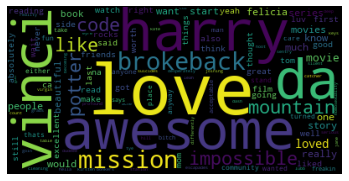

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate_from_frequencies(Counter(pos_split))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

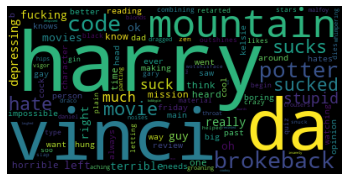

In [ ]:
wordcloud = WordCloud().generate_from_frequencies(Counter(neg_split))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

They look fairly similar apart from the words above like "love" and "terrible". Time for some machine learning to pick out those words!

# Getting the Data Ready

We still have some way to go - the number of unique words we have is still quite large:

In [ ]:
len(Counter(pos_split))

1159

There are some nonsense short words introduced by our earlier work:

In [ ]:
for word in list(Counter(pos_split).keys()):
    if len(word) <= 2:
        print(word)

da
oh
fr
go
im
na
ca
ti
ur
ps
ok
us
w
x
ya
um
eh
tv
tc
v
th
hp
la
g
ta
n
xd
gn
gl
pc
u


... and we also have cases where multiple words that are similar appear as more than one entry ("love", "loved"...).

It's fairly normal to try and map all of the different tenses/versions of a word to just the word itself - this process is known as *stemming* or *lemmatizing* (these are slightly different in process but achieve the same goal!); and luckily NLTK has a number of ways for us to do it:

In [ ]:
from nltk.stem.api import StemmerI
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Look! It works!
print(stemmer.stem("love"))
print(stemmer.stem("loved"))
print(stemmer.stem("loving"))

love
love
love


Now we can build version 3 of our preprocessing pipeline - we filter the nonsense words out and stem everything else. I'm going to rewrite this in a slightly better way so we can use the code later:


In [ ]:
def stopword_and_punct_filter(word):
    return word.isalpha() and word not in stopwords and len(word) > 2

def process_line(line):
    line = word_tokenize(line)
    line = map(stemmer.stem, line)

    return list(filter(stopword_and_punct_filter, line))

def split_and_flatten_v3(listy):

    output = []

    for line in listy:
        line = process_line(line)
        output += line

    return output

In [ ]:
pos_split = split_and_flatten_v3(positives)

print(Counter(pos_split).most_common(10))

[('love', 1792), ('harri', 1085), ('like', 1050), ('awesom', 1030), ('vinci', 1000), ('brokeback', 999), ('mission', 997), ('imposs', 997), ('code', 994), ('mountain', 984)]


In [ ]:
len(Counter(pos_split))

1000

So we can see we've reduced the number of words by about 150, or nearly 15%!

Now let's talk about how to transform this into a format that machine learning can take. We need the entries to be numeric - so one approach is simply to assign one column for each unique row, and encode how many times that word appears in each array. In this method we ignore order!

This is where scikit_learn returns - with a bit of help we can make this happen!

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

texty = umich["Text"].apply(lambda x: " ".join(process_line(x)))

bag_of_words = cv.fit_transform(texty).toarray()

# We can again see the counts of words
print(cv.vocabulary_)

# Can also get what each column corresponds to:
print(cv.get_feature_names_out())

# Show what the first entry has been encoded as:
print(bag_of_words[0].tolist())

{'vinci': 1533, 'code': 260, 'book': 164, 'awesom': 94, 'thi': 1436, 'first': 540, 'clive': 250, 'cussler': 328, 'ever': 465, 'read': 1165, 'even': 463, 'like': 861, 'relic': 1181, 'plausibl': 1096, 'lot': 885, 'ultimatli': 1501, 'seem': 1264, 'hold': 695, 'exagger': 473, 'midnight': 948, 'went': 1555, 'buy': 193, 'amaz': 44, 'cours': 302, 'love': 889, 'want': 1543, 'someth': 1327, 'better': 136, 'differ': 381, 'thought': 1443, 'great': 624, 'kite': 818, 'runner': 1232, 'actual': 18, 'good': 615, 'movi': 976, 'pretti': 1123, 'one': 1028, 'beauti': 122, 'ive': 771, 'seen': 1265, 'get': 599, 'wrong': 1598, 'turn': 1492, 'light': 860, 'radio': 1156, 'enjoy': 448, 'realli': 1170, 'night': 1005, 'mind': 952, 'thing': 1438, 'veri': 1525, 'slash': 1319, 'race': 1152, 'hey': 684, 'also': 40, 'would': 1592, 'disappoint': 386, 'angel': 51, 'demon': 365, 'yeah': 1603, 'interest': 762, 'backtori': 104, 'variou': 1522, 'religi': 1182, 'histor': 691, 'figur': 531, 'time': 1455, 'scifi': 1254, 'girl'

This is a bit silly, but not actually that bad. We have just under 7000 entries with 1000 unique rows. This is still feasible!

Another way to approach the problem is to be a bit smarter in how we calculate the numbers in the above array. TF-IDF is a much more common way to vectorise our data as it weights the words not only on how frequently they appear within the entry, but also how rare that word is across all entries. This way, words that are very common across all the entries are weighted smaller than those that are more unique.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(decode_error='ignore')
bag_of_words_v2 = tfidf.fit_transform(texty).toarray()

Let's use this to train a machine learning model:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

labels = umich['Label'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(bag_of_words_v2, labels, test_size=0.2)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print("f1 score:", f1_score(y_predict, y_test))

f1 score: 0.885282596530498


Cool! Of course, since we chose the decision tree model we can now plot it!

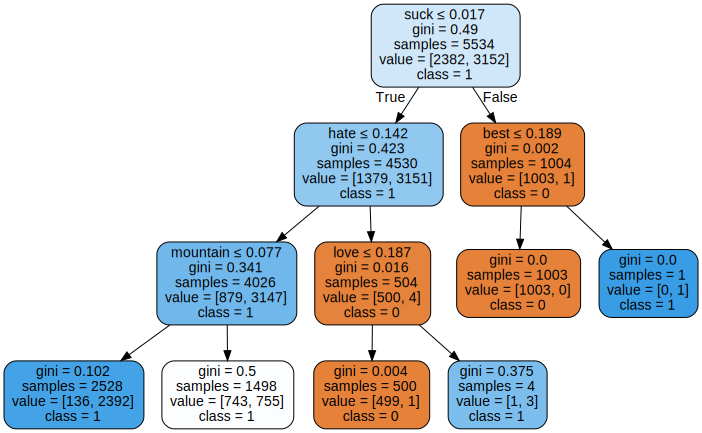

In [ ]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=tfidf.get_feature_names_out(),
                                class_names=['0', '1'],
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

Just for a bit of fun - let's "deploy" this model in a very silly way. The below program will accept a user input, predict whether it is a positive or negative review, and then output what the model thinks:

In [ ]:
my_input = input("What did you think of the movie?")

parsed = " ".join(process_line(my_input))
parsed = tfidf.transform([parsed])
predict =  model.predict(parsed)

if predict == [1]:
    print("I think that was a positive review!")
else:
    print("I think that was a negative review")

What did you think of the movie?i hated it 
I think that was a negative review


This is just scratching the surface for what you can do with NLP for ML - in fact, what we have just done is pretty simple. We are only considering each word in isolation, with no relationships between pairs of words. For example, if a word being preceded by "not" or "very" produces two very different meanings! We can also engineer some other features of the inputs, such as the length of the review, the percentage of capital letters, the amount of punctuation etc. There's a lot of information for us to use!

Activity

Since this week's work is only going to be done if the class is ahead of schedule, I'm being a bit nasty this week and not giving you many hints at all, and I'm not even giving you a nicely formatted dataset! Below are three URLs to the zipped versions of the datasets. I want you to pick a dataset and build a natural language processing model for each to classify the inputs into positive/negative, or spam/not spam. There are no "correct" answers here - but you should be able to get a pretty good F1 score for each of the datasets!

These dataset come from the following sources:
https://www.cs.cornell.edu/people/pabo/movie-review-data/
https://archive.ics.uci.edu/ml/datasets/Spambase
https://ai.stanford.edu/~amaas/data/sentiment/
